In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Plotly for interactive visualizations
import plotly.express as px

# Statistical tests / modeling
from scipy import stats
import statsmodels.api as sm


In [2]:
df = pd.read_csv('Dataset salary 2024.csv')

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,16534.000000,1.653400e+04,16534.000000,16534.000000
mean,2023.226866,1.637270e+05,149686.777973,32.003750
std,0.713558,3.402057e+05,68505.293156,46.245158
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2023.000000,1.017630e+05,101125.000000,0.000000
50%,2023.000000,1.422000e+05,141300.000000,0.000000
75%,2024.000000,1.872000e+05,185900.000000,100.000000
max,2024.000000,3.040000e+07,800000.000000,100.000000


In [6]:
df.info()
df.isnull().sum()

for col in ['job_title', 'experience_level', 'employment_type', 'employee_residence', 'company_size']:
    print(f"{col} unique values: {df[col].unique()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB
job_title unique values: ['AI Engineer' 'Data Engineer' 'Machine Learning Engineer' 'ML Engineer'
 'Data Analyst' 'NLP Engineer' 'Data Scientist' 'Applied Scientist'
 'Data Manager' 'Data Architect' 'Data Operations M

In [7]:
# Median salary
print("Median salary:",'$',int(df['salary_in_usd'].median()))

# Salary by experience level
print((df.groupby('experience_level')['salary_in_usd'].median()))

# Salary by job title
print((df.groupby('job_title')['salary_in_usd'].median().sort_values(ascending=False)))


Median salary: $ 141300
experience_level
EN     83000.0
EX    192000.0
MI    115000.0
SE    155000.0
Name: salary_in_usd, dtype: float64
job_title
Analytics Engineering Manager     399880.0
Data Science Tech Lead            375000.0
Head of Machine Learning          330000.0
Managing Director Data Science    280000.0
AWS Data Architect                258000.0
                                    ...   
Insight Analyst                    50838.0
Compliance Data Analyst            45000.0
Staff Data Analyst                 44753.0
CRM Data Analyst                   40000.0
Principal Data Architect           38154.0
Name: salary_in_usd, Length: 155, dtype: float64


In [8]:
print((df.groupby(['employment_type','job_title'])['salary_in_usd'].median()))



employment_type  job_title                         
CT               AI Engineer                            50000.0
                 AI Research Engineer                   63333.0
                 AI Research Scientist                  88888.0
                 Applied Machine Learning Scientist     64090.5
                 Business Data Analyst                  67500.0
                                                         ...   
PT               Data Engineer                          61137.0
                 Data Science                           37154.0
                 Data Scientist                        110000.0
                 ML Engineer                            15966.0
                 Research Scientist                    112000.0
Name: salary_in_usd, Length: 200, dtype: float64


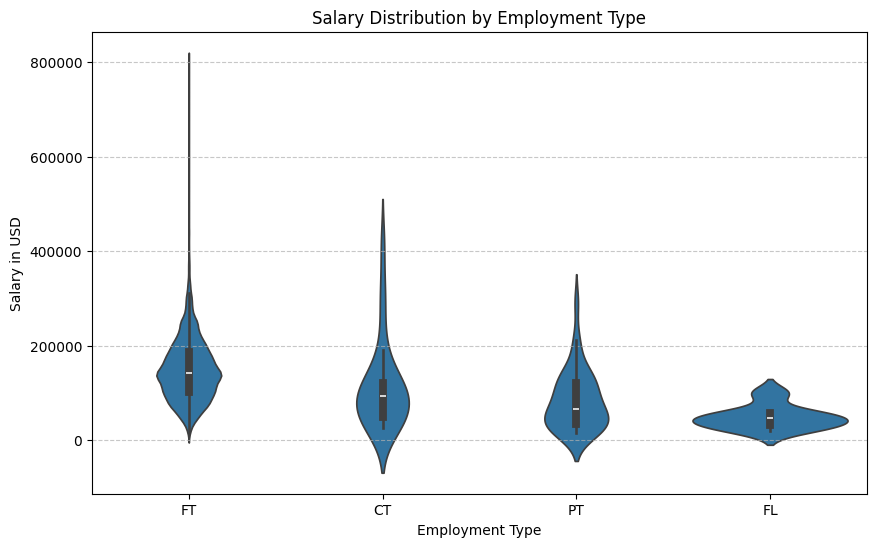

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='employment_type', y='salary_in_usd', data=df)
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Observations and Key Insights from the Salary Distribution by Employment Type Plot:

#### 1. Observations from the Plot

*   **FT (Full-time):**
    *   The median salary (indicated by the thick line in the middle of the violin) is relatively high and consistent.
    *   The distribution is fairly wide, suggesting a broad range of salaries, but with fewer extreme outliers compared to Contract (CT) and Part-time (PT) roles.

*   **CT (Contract) and PT (Part-time):**
    *   These categories exhibit long tails extending upwards, which explains the occasional very high maximum salaries observed earlier in the data.
    *   Median salaries for these roles are generally lower than those for full-time positions, even though some individual contracts or part-time engagements can offer substantial compensation.

*   **FL (Freelance):**
    *   The median salary is lower, and the distribution is notably narrower, concentrating at the lower end of the salary spectrum. This often reflects smaller, more short-term projects with typically lower pay.

#### 2. Key Insights

*   **Full-time roles** tend to offer more stable and consistently higher-paying opportunities.
*   **Contract and part-time roles**, while having lower median salaries, can occasionally provide very high compensation (extreme outliers) but are inherently less consistent.
*   **Freelance work** typically features lower median pay and a more concentrated salary range at the lower levels, indicating that it might be more suited for supplemental income or project-based work rather than a primary high-earning source for most.

These insights highlight the distinct financial characteristics and earning potential associated with different employment types within the dataset.

In [10]:
print((df.groupby('employment_type')['salary_in_usd'].median().sort_values(ascending=False)))

employment_type
FT    141525.0
CT     93856.0
PT     66451.5
FL     47777.5
Name: salary_in_usd, dtype: float64


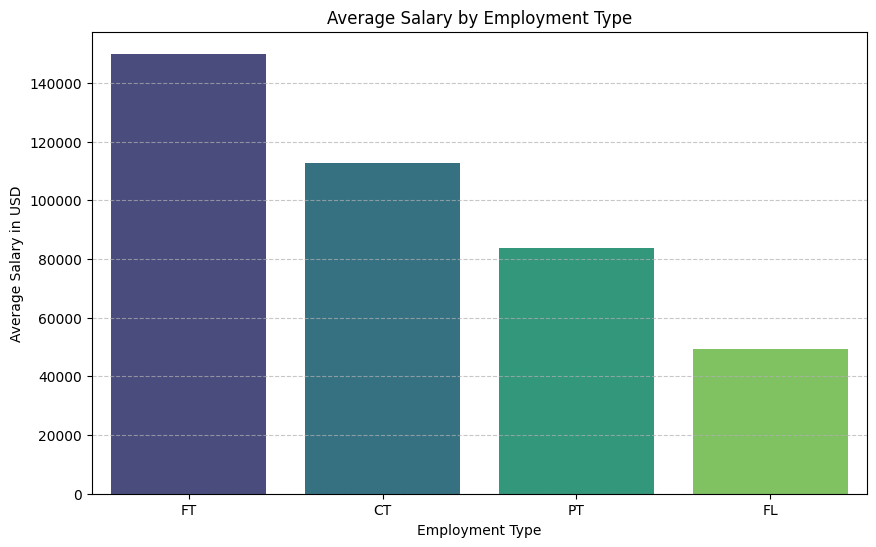

In [11]:
average_salaries_by_employment_type = df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='employment_type', y='salary_in_usd', data=average_salaries_by_employment_type, palette='viridis', hue='employment_type', legend=False)
plt.title('Average Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

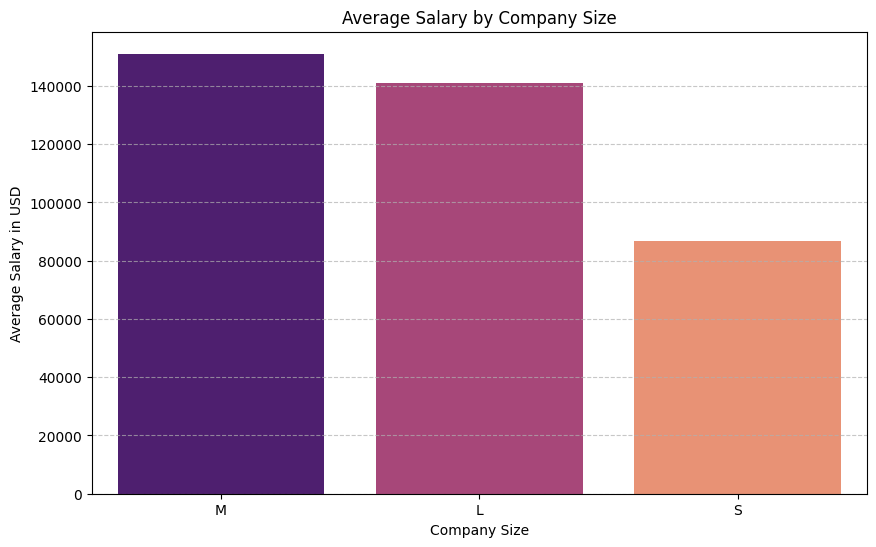

In [12]:
average_salaries_by_company_size = df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='company_size', y='salary_in_usd', data=average_salaries_by_company_size, palette='magma', hue='company_size', legend=False)
plt.title('Average Salary by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Average Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Calculate the count of each employment type within each company size
employment_type_counts = df.groupby(['company_size', 'employment_type']).size().unstack(fill_value=0)

# Find the dominant employment type for each company size
dominant_employment_type = employment_type_counts.idxmax(axis=1)

print("Dominant Employment Type by Company Size:")
print(dominant_employment_type)

display(employment_type_counts)


Dominant Employment Type by Company Size:
company_size
L    FT
M    FT
S    FT
dtype: object


employment_type,CT,FL,FT,PT
company_size,,,,
L,7,1,1022,10
M,12,6,15266,22
S,9,7,166,6


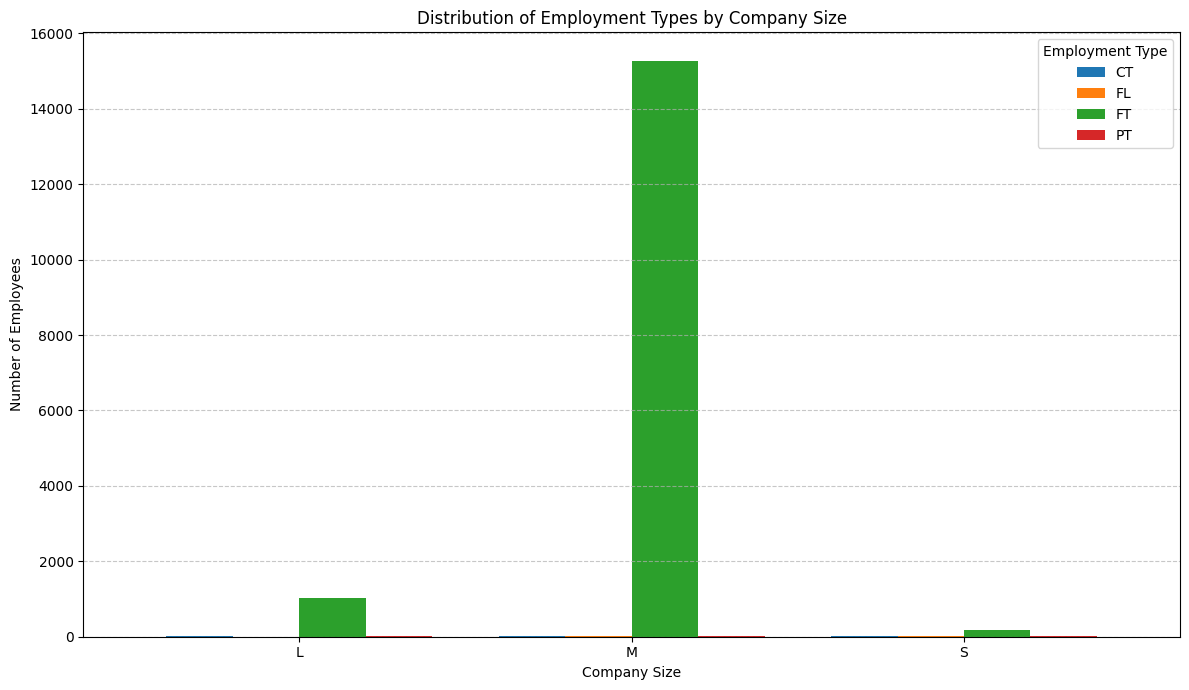

In [14]:
employment_type_counts.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Distribution of Employment Types by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Employment Type')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


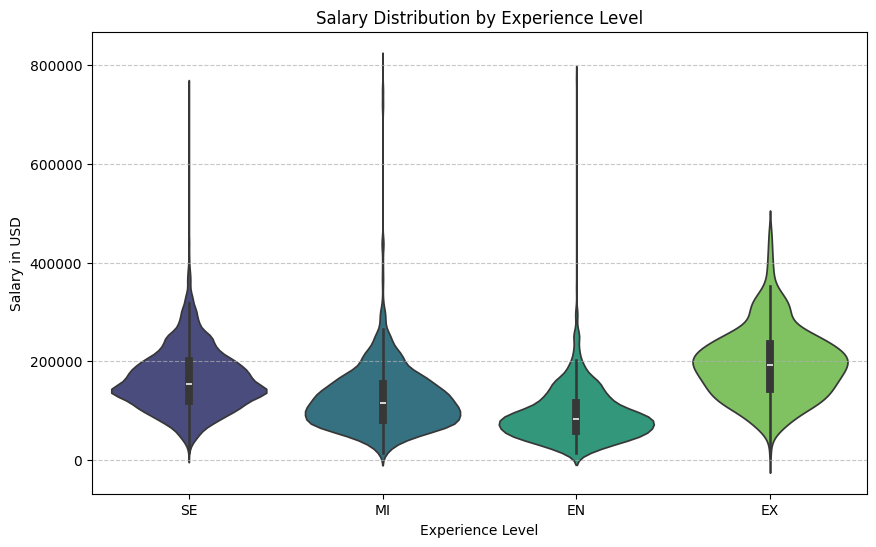

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.violinplot(x='experience_level', y='salary_in_usd', data=df, palette='viridis', hue='experience_level', legend=False)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

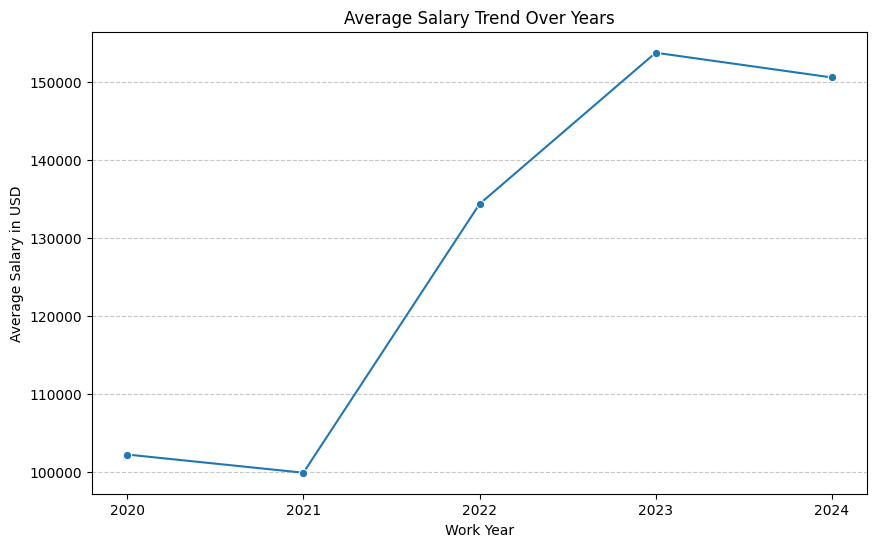

In [16]:
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=average_salary_by_year, marker='o')
plt.title('Average Salary Trend Over Years')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.xticks(average_salary_by_year['work_year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Insight on Salary Trend (2020-2021):

The slight decrease or stagnation in average salaries observed from 2020 to 2021 can be directly attributed to the severe economic impact of the COVID-19 pandemic. During this period:

*   **Business Closures and Disruptions:** Many businesses faced closures or significant operational disruptions due to lockdowns and restrictions, leading to reduced revenue.
*   **Salary Cuts and Furloughs:** To mitigate financial losses, some companies resorted to salary reductions, hiring freezes, or furloughs for employees, especially in sectors heavily impacted by the pandemic.
*   **Uncertainty and Caution:** The overall economic uncertainty led companies to adopt a cautious approach to compensation, often prioritizing retention over salary increases, or even implementing temporary pay cuts.

This period was challenging for many, and the salary data reflects the widespread economic adjustments made by businesses to navigate the unprecedented circumstances of the pandemic.

### Insight on Salary Increase (2021-2022):

The increase in average salaries from 2021 to 2022 can be attributed to several factors related to the recovery from the COVID-19 pandemic:

*   **Economic Rebound:** As vaccination efforts progressed and economies reopened, businesses began to pick up, leading to increased demand for talent.
*   **Return to Work / Hybrid Models:** With people able to return to work, companies adapted. The introduction and wider adoption of remote and hybrid work settings allowed many businesses to save money on operational costs (e.g., office space, utilities). These savings could then, in some cases, be re-allocated to employee compensation, making salary packages more competitive.
*   **Talent Scarcity:** The period also saw shifts in the job market, with a potential increase in demand for skilled workers, particularly in tech and data roles, further driving up salaries as companies competed for talent.

In [17]:
remote_ratio_counts = df.groupby(['company_size', 'remote_ratio']).size().unstack(fill_value=0)
display(remote_ratio_counts)

remote_ratio,0,50,100
company_size,,,
L,605,152,283
M,10472,58,4776
S,41,39,108


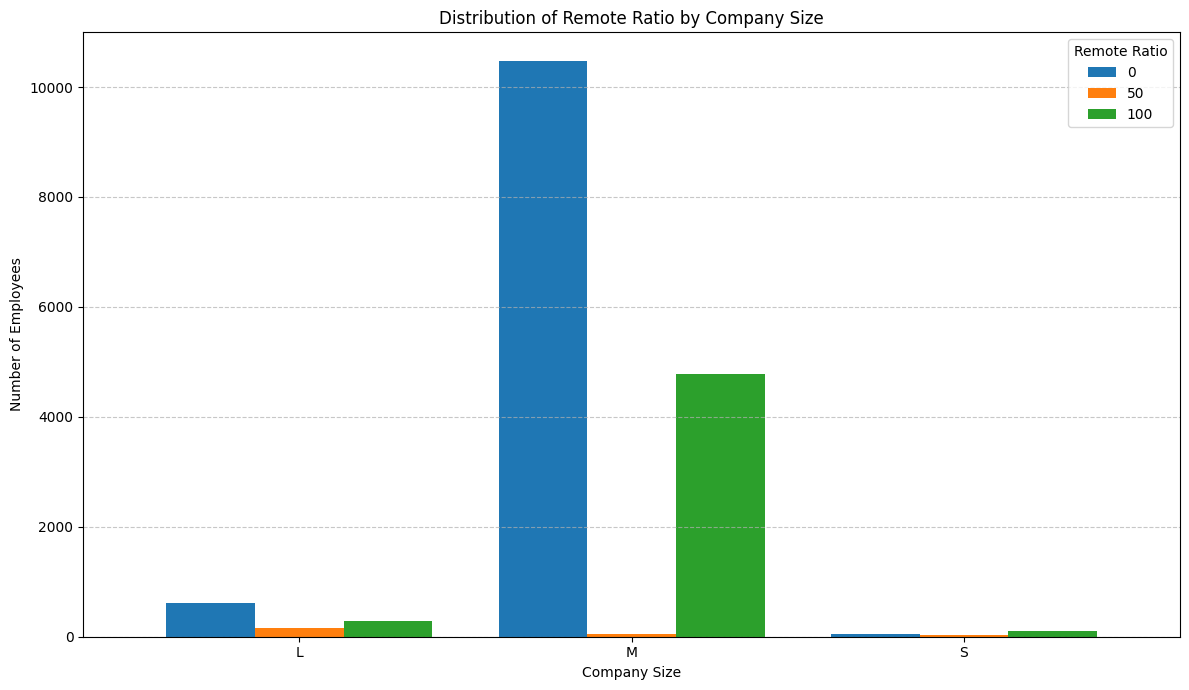

In [18]:
remote_ratio_counts.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Distribution of Remote Ratio by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Remote Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [19]:
remote_work_by_experience = df.groupby(['experience_level', 'remote_ratio']).size().unstack(fill_value=0)
display(remote_work_by_experience)

remote_ratio,0,50,100
experience_level,,,
EN,874,80,371
EX,316,9,176
MI,2829,96,1113
SE,7099,64,3507


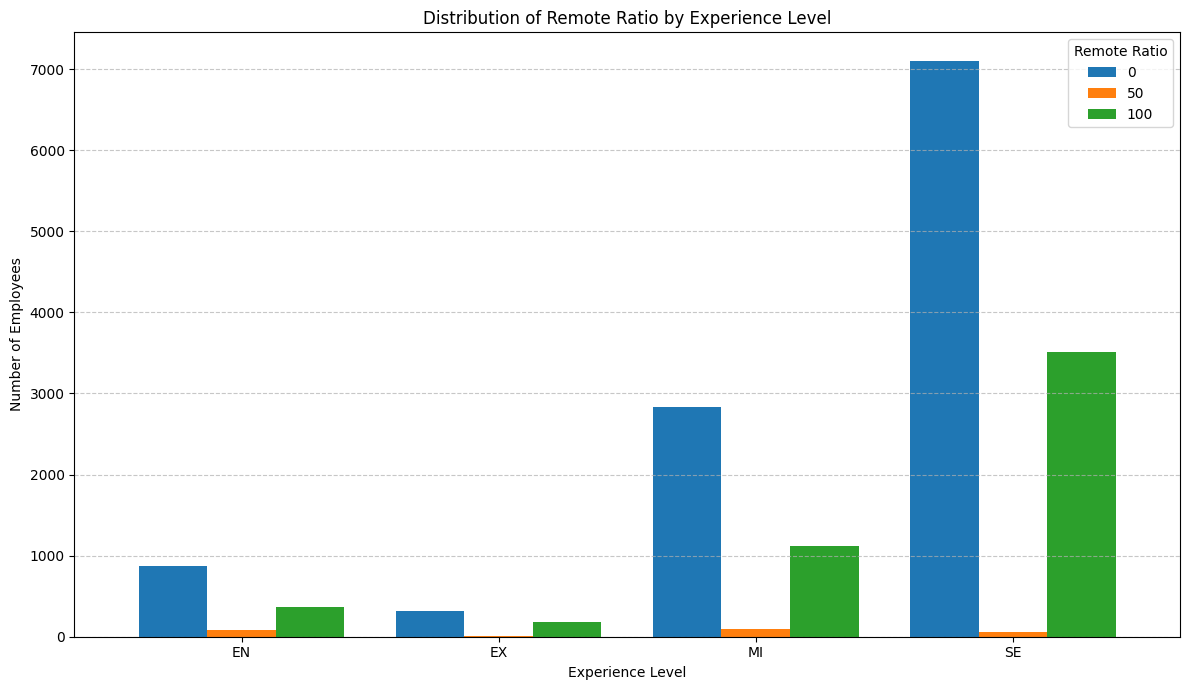

In [20]:
remote_work_by_experience.plot(kind='bar', figsize=(12, 7), width=0.8)
plt.title('Distribution of Remote Ratio by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Remote Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insight on Remote Work Distribution by Experience Level:

The analysis of remote work distribution across different experience levels reveals interesting patterns:

*   **Overall Dominance of On-Site:** For all experience levels (Entry-Level 'EN', Executive-Level 'EX', Mid-Level 'MI', Senior-Level 'SE'), a significant majority of employees are primarily on-site (remote ratio 0), as indicated by the largest bars for this category.

*   **Fully Remote Work (100% Remote Ratio):**
    *   **Senior-Level (SE)** professionals represent the largest absolute number of fully remote workers (3507) in this dataset, followed by Mid-Level (MI) professionals (1113).
    *   When considering the *proportion* of fully remote workers relative to their total number within each experience level, **Executive-Level (EX) professionals show the highest proportion (~35%)** of fully remote arrangements, closely followed by Senior-Level (SE) professionals (~32.9%). Entry-Level (EN) has a lower proportion (~29.7%) but a substantial count of fully remote roles.

*   **Hybrid Work (50% Remote Ratio):** Hybrid work arrangements are notably less common across all experience levels compared to both fully on-site and fully remote options. The counts for hybrid roles are significantly lower, particularly for Executive (9) and Senior (64) levels.

**Key Conclusion:** While fully on-site roles remain prevalent, fully remote work is a substantial component of the work landscape, particularly for **more experienced professionals at the Senior and Executive levels**, who show both high absolute numbers and proportions of fully remote arrangements. Hybrid models appear to be a less adopted work style in this dataset.

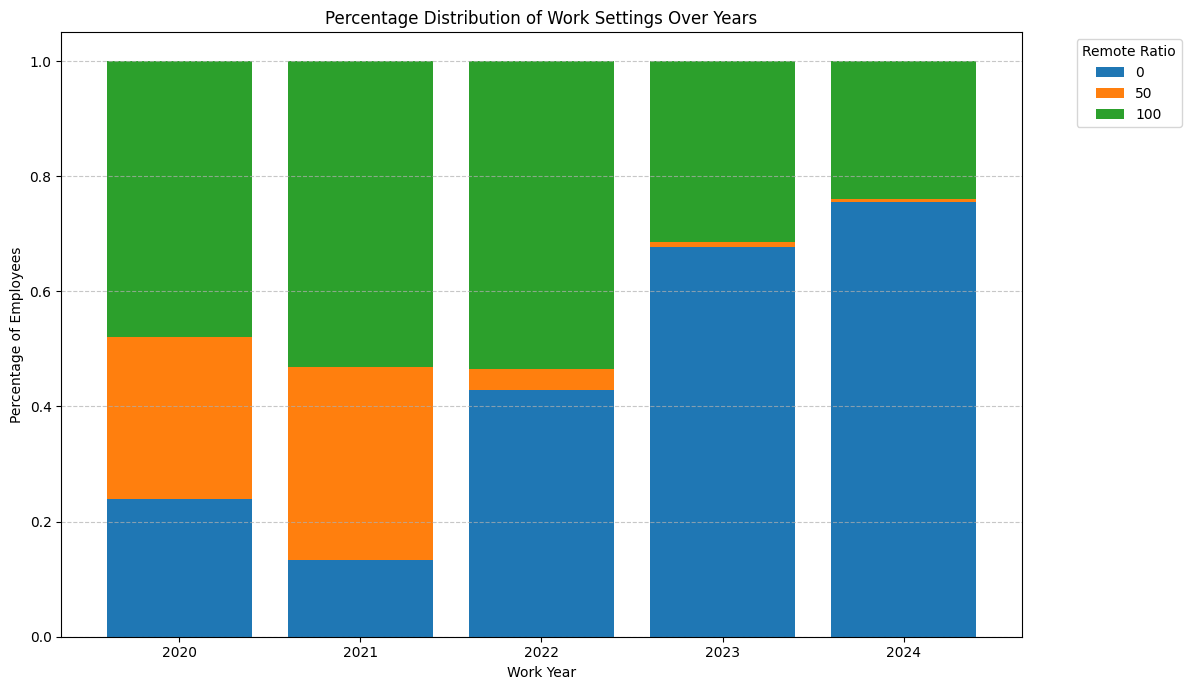

In [21]:
work_setting_trend_counts = df.groupby(['work_year', 'remote_ratio']).size().unstack(fill_value=0)

# Calculate percentages for each year
work_setting_trend_percent = work_setting_trend_counts.apply(lambda x: x / x.sum(), axis=1)

# Plotting the trend of work settings (as percentages) over years
work_setting_trend_percent.plot(kind='bar', figsize=(12, 7), stacked=True, width=0.8)
plt.title('Percentage Distribution of Work Settings Over Years')
plt.xlabel('Work Year')
plt.ylabel('Percentage of Employees')
plt.xticks(rotation=0)
plt.legend(title='Remote Ratio', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Insight on Work Setting Trend (2020-2024):

The stacked bar plot clearly visualizes the percentage distribution of work settings (on-site, hybrid, fully remote) across the years from 2020 to 2024. Here are the key observations:

*   **2020 - 2021: Shift Towards Remote:** In 2020, fully remote work (100% remote ratio) already constituted the largest share (48%), with hybrid (28%) and on-site (24%) also present. By 2021, fully remote work peaked at 53%, and hybrid work also increased to 33%, while on-site work saw a decrease to 13%. This period strongly reflects the impact of the pandemic pushing towards remote and hybrid models.

*   **2022: Hybrid Decline, On-site Rebound:** A significant shift occurred in 2022. While fully remote work remained high (53%), hybrid work dramatically decreased to less than 4%. Concurrently, on-site work saw a substantial rebound, increasing to almost 43%.

*   **2023 - 2024: Strong Return to Office:** The trend towards on-site work accelerated from 2023 onwards. On-site work became the dominant mode, reaching nearly 68% in 2023 and further increasing to over 75% in 2024. Both fully remote and hybrid work percentages saw significant declines during this period, with hybrid work becoming almost negligible by 2024.

**Overall Trend:** The data shows a clear shift: from a significant increase in remote and hybrid work during the initial pandemic years (2020-2021), there has been a strong and consistent return to predominantly on-site work settings from 2022 to 2024, with hybrid models becoming increasingly uncommon.